In [ ]:
# !pip install -r ../requirements.txt

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors
from random import random

In [2]:
PROVIENCE_FUEL_TYPE_COUNTS = "100A_fuel_type_provience_count.csv"

In [3]:
color_label = [
    [-9999, (255, 255, 255, 255), ""],
    [1, (209, 255, 115, 255), "C-1 Spruce-Lichen Woodland"],
    [2, (34, 102, 51, 255), "C-2 Boreal Spruce"],
    [3, (131, 199, 149, 255), "C-3 Mature Jack or Lodgepole Pine"],
    [4, (112, 168, 0, 255), "C-4 Immature Jack or Lodgepole Pine"],
    [5, (223, 184, 230, 255), "C-5 Red and White Pine"],
    [7, (112, 12, 242, 255), "C-7 Ponderosa Pine / Douglas Fir"],
    [11, (196, 189, 151, 255), "D-1 Leafless Aspen"],
    [13, (196, 189, 151, 255), "D-1/D-2 Aspen"],
    [31, (255, 255, 190, 255), "O-1a Matted Grass"],
    [101, (130, 130, 130, 255), "Non-fuel"],
    [102, (115, 223, 255, 255), "Water"],
    [105, (204, 204, 204, 255), "Vegetated Non-Fuel"],
    [415, (255, 211, 127, 255), "M-1 Boreal Mixedwood - Leafless (15% Conifer)"],
    [625, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (25% Conifer)"],
    [650, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (50% Conifer)"],
    [675, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (75% Conifer)"],
]

# Convert RGBA values (0-255) to Matplotlib format (0-1)
color_dict = {entry[2]: np.array(entry[1]) / 255 for entry in color_label}
label_dict = {entry[2]: entry[0] for entry in color_label}

# Create colormap & normalizer
unique_values = list(color_dict.keys())
colors = [color_dict[val] for val in unique_values]
# cmap = mcolors.ListedColormap(colors)
# norm = mcolors.BoundaryNorm(unique_values + [max(unique_values) + 1], cmap.N)

In [4]:
prov_order = [
    'Yukon',
    'NorthWest Territories',
    'Nunavut',
    'British Columbia',
    'Alberta',
    'Saskatchewan',
    'Manitoba',
    'Quebec',
    'Ontario',
    'NewFoundLand and Labrador',
    'New Brunswick',
    'Nova Scotia',
    'Prince Edward Islands',
 ]


In [5]:
# Metadata from "https://cwfis.cfs.nrcan.gc.ca/downloads/nbac/nbac_1972_2023_20240530_shp_metadata.pdf" Pages 22-23
province_label = {
    "AB": "Alberta",
    "BC": "British Columbia",
    "MB": "Manitoba",
    "NB": "New Brunswick",
    "NL": "Newfoundland and Labrador",
    "NS": "Nova Scotia",
    "NT": "Northwest Territories",
    "NU": "Nunavut",
    "ON": "Ontario",
    "PC": "Parks Canada",
    "PE": "Prince Edward Islands",
    "QC": "Quebec",
    "SK": "Saskatchewan",
    "YT": "Yukon Territory",
}

short_prov_label = {province_label[short_prov].lower(): short_prov for short_prov in province_label}
short_prov_label

{'alberta': 'AB',
 'british columbia': 'BC',
 'manitoba': 'MB',
 'new brunswick': 'NB',
 'newfoundland and labrador': 'NL',
 'nova scotia': 'NS',
 'northwest territories': 'NT',
 'nunavut': 'NU',
 'ontario': 'ON',
 'parks canada': 'PC',
 'prince edward islands': 'PE',
 'quebec': 'QC',
 'saskatchewan': 'SK',
 'yukon territory': 'YT'}

In [6]:
combined_label_dict = {
    "M-1/M-2 Boreal Mixedwood" : [
        "M-1 Boreal Mixedwood - Leafless (15% Conifer)",
        "M-1/M-2 Boreal Mixedwood (25% Conifer)",
        "M-1/M-2 Boreal Mixedwood (50% Conifer)",
        "M-1/M-2 Boreal Mixedwood (75% Conifer)"
    ],
    "D-1/D-2 Aspen ": [
        "D-1 Leafless Aspen",
        "D-1/D-2 Aspen"
    ]
}

In [7]:
fuel_type_prov_count_df = pd.read_csv(
    PROVIENCE_FUEL_TYPE_COUNTS
)
fuel_type_prov_count_df

,Provience,Fuel Type,Count
0,Alberta,C-1 Spruce-Lichen Woodland,1289253
1,Alberta,C-2 Boreal Spruce,132396493
2,Alberta,C-3 Mature Jack or Lodgepole Pine,46591625
3,Alberta,C-4 Immature Jack or Lodgepole Pine,42927384
4,Alberta,C-5 Red and White Pine,145694
...,...,...,...
184,Yukon,Vegetated Non-Fuel,3488655
185,Yukon,M-1 Boreal Mixedwood - Leafless (15% Conifer),6542648
186,Yukon,M-1/M-2 Boreal Mixedwood (25% Conifer),36030274
187,Yukon,M-1/M-2 Boreal Mixedwood (50% Conifer),8327272


In [8]:
water_type_val = 'Water'

# drop water data
fuel_type_prov_count_df = fuel_type_prov_count_df[fuel_type_prov_count_df['Fuel Type'] != water_type_val]

# discard labels and color too
del color_dict[water_type_val]
del label_dict[water_type_val]

In [9]:
# combine the same groups
for group in combined_label_dict:
    # get index of new group
    new_group_df = fuel_type_prov_count_df[
        fuel_type_prov_count_df['Fuel Type'].isin(
            combined_label_dict[group]
        )
    ]

    # !!! this should be right after extracction of data and before index reset
    # drop the data 
    fuel_type_prov_count_df.drop(
        new_group_df.index,
        inplace = True
    )

    # combine the same groups into one
    new_group_df = new_group_df.groupby('Provience').sum().reset_index()

    # add the new fuel type name
    new_group_df['Fuel Type'] = group

    # add the combined data back
    fuel_type_prov_count_df = pd.concat(
        [
            fuel_type_prov_count_df,
            new_group_df
        ]
    )

    # updated the label and color info too
    label_dict[group] = label_dict[combined_label_dict[group][0]]
    color_dict[group] = color_dict[combined_label_dict[group][0]]

    # drop the colors and lables that are combined
    for fuel_type in combined_label_dict[group]:
        del color_dict[fuel_type]
        del label_dict[fuel_type]

    del new_group_df

fuel_type_prov_count_df

/tmp/ipykernel_80771/2309918090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_type_prov_count_df.drop(


,Provience,Fuel Type,Count
0,Alberta,C-1 Spruce-Lichen Woodland,1289253
1,Alberta,C-2 Boreal Spruce,132396493
2,Alberta,C-3 Mature Jack or Lodgepole Pine,46591625
3,Alberta,C-4 Immature Jack or Lodgepole Pine,42927384
4,Alberta,C-5 Red and White Pine,145694
...,...,...,...
8,Ontario,D-1/D-2 Aspen,219881889
9,Prince Edward Islands,D-1/D-2 Aspen,774164
10,Quebec,D-1/D-2 Aspen,458230141
11,Saskatchewan,D-1/D-2 Aspen,123603063


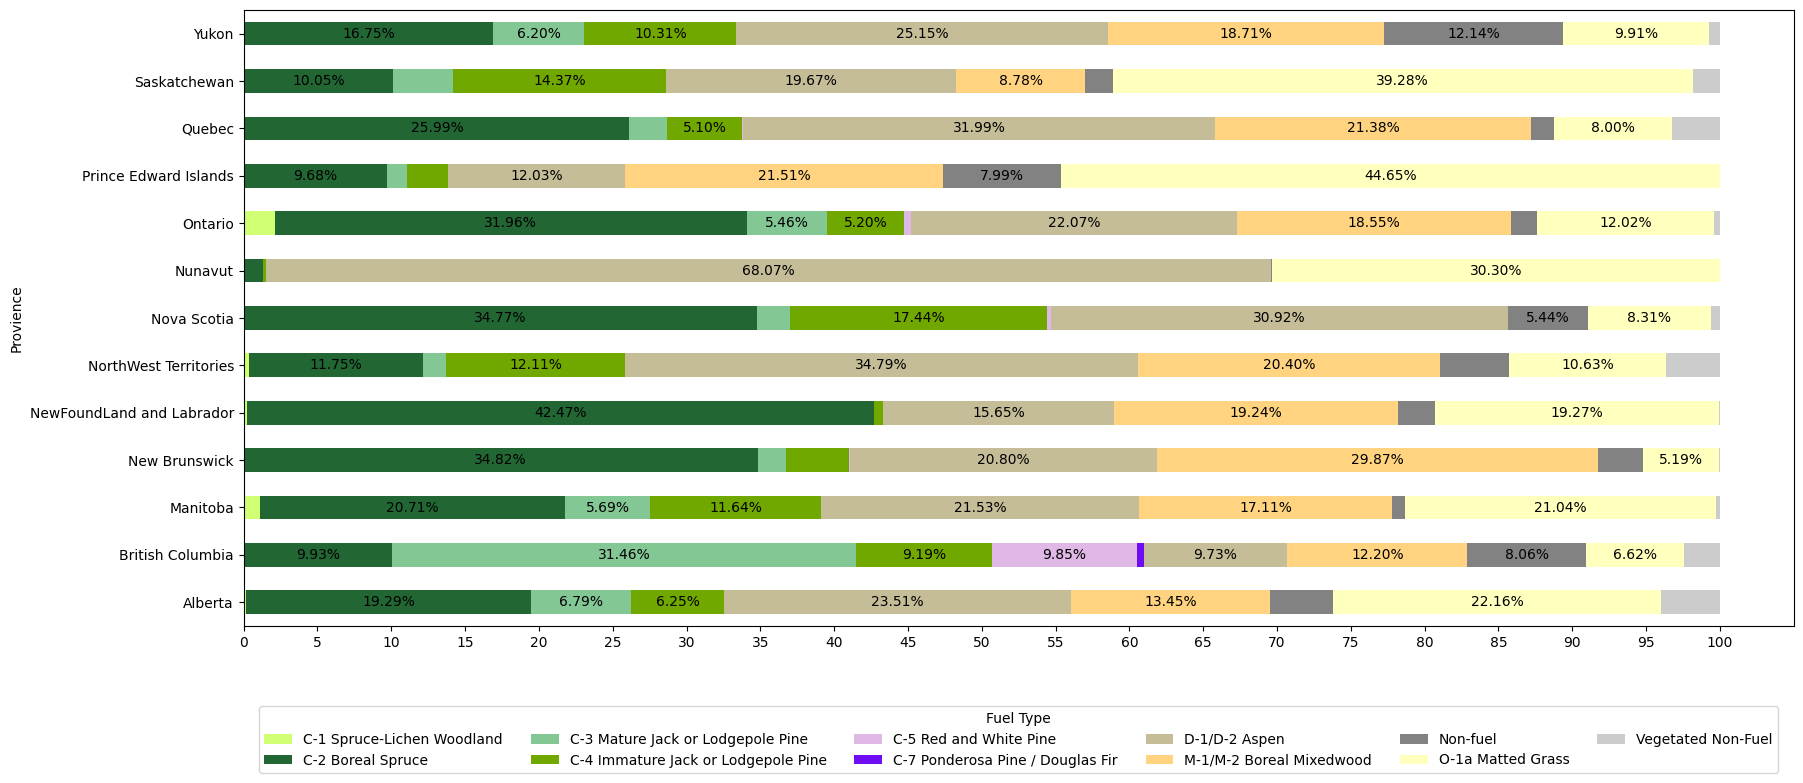

In [10]:
fuel_type_prov_count_matrix_df = fuel_type_prov_count_df.pivot(
    index='Provience', 
    columns='Fuel Type', 
    values='Count'
).fillna(0)
# convert to percentages
fuel_type_prov_count_matrix_df = fuel_type_prov_count_matrix_df.div(
    fuel_type_prov_count_matrix_df.sum(
        axis = 1
    ), 
    axis=0
) * 100

ax = fuel_type_prov_count_matrix_df.plot(
    kind = 'barh',
    stacked = True,
    color = color_dict,
    figsize=(20,8)
)
# .legend(
#     loc='lower center',
#     bbox_to_anchor=(0.5, -0.20),
#     ncol = 3
#)


# Add percentage labels
for container in ax.containers:
    labels = []
    for bar in container:
        height = bar.get_width()
        if height > 5:
            labels.append(f'{height:.2f}%')
        else:
            labels.append('')
    ax.bar_label(container, labels=labels, label_type='center')


plt.xticks(range(0,101,5))
plt.legend(
    title="Fuel Type", 
    bbox_to_anchor=(.5, -0.250), 
    loc='lower center',
    ncol=6
)

In [11]:
def plot_pie_inner_text_title(
    title:str,
    fontsize=40, 
    weight='bold',
    color='gray', 
):
    ax.text(
        0,      
        0, 
        title, 
        ha = 'center', 
        va = 'center', 
        color = color, 
        fontsize = fontsize, 
        weight = weight
    )

In [12]:
def plot_inner_ring(
    data,
    short_prov_label: dict = short_prov_label,
    small_cutoff = 3,
    large_percent_font_size = 30,
    small_percent_font_size = 15,
    font_color = 'black',
    label_dist:float = 0.75,
    inner_ring_sorted:bool = True
):
    data = data.sort_index(
        ascending = inner_ring_sorted
    )

    wedges, text = ax.pie(
        x = data,
        # labels = inner_ring_data.index,
        colors = plt.cm.Reds(
            np.linspace(
                0.0, 
                0.9, 
                len(data.index)
            )
        ),
        radius = 1,
        wedgeprops=dict(width=0.5, edgecolor='w')
    )
    for i, wedge in enumerate(wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2
        wedge_percent = (wedge.theta2 - wedge.theta1) / 360 * 100
        x = label_dist * np.cos(np.deg2rad(ang))
        y = label_dist * np.sin(np.deg2rad(ang))
        prov_label = data.index[i]
        if wedge_percent > small_cutoff:
            ax.text(
                x, 
                y, 
                f"{prov_label}\n({wedge_percent:0.2f})%" if len(prov_label) < 15 else f"{short_prov_label[prov_label.lower()]}\n({wedge_percent:0.2f})%",
                ha='center', 
                va='center', 
                color=font_color, 
                fontsize = large_percent_font_size, 
            )
        else:
            rand_move = 0.1 if i%2 == 0 else -0.1
            x = (label_dist + rand_move) * np.cos(np.deg2rad(ang))
            y = (label_dist + rand_move) * np.sin(np.deg2rad(ang))
            ax.text(
                x, 
                y, 
                f"{short_prov_label[prov_label.lower()]}({wedge_percent:0.1f})%", 
                ha='center', 
                va='center', 
                color=font_color, 
                fontsize = small_percent_font_size, 
            )

In [ ]:
def plot_outer_ring(
    outer_ring_df,
    inner_ring_df,
    other_color:str = '#FFFFFF',
    label_dist:float = 1.25,
    outer_ring_cutoff_percent = 0.5
):
        
    wedges, text = ax.pie(
        x = outer_ring_df['Count'],
        # labels = outer_ring_df['Count'],
        colors = outer_ring_df['Fuel Type'].apply(lambda fuel: color_dict[fuel]),
        radius=1.5,
        wedgeprops=dict(
            width=0.5,
            edgecolor='black',
            linewidth=0,
        )
    )
    for i, wedge in enumerate(wedges):
        ang = (wedge.theta2 + wedge.theta1) / 2
        wegde_angle = (wedge.theta2 - wedge.theta1) / 360 * 100
        if wegde_angle > outer_ring_cutoff_percent:
            rand_move = 0.1 if i%2 == 0 else -0.1
            x = (label_dist + rand_move) * np.cos(np.deg2rad(ang))
            y = (label_dist + rand_move) * np.sin(np.deg2rad(ang))
            prov = outer_ring_df.iloc[i]['Provience']
            prov_area = int(inner_ring_df[prov])
            prov_area_percent = outer_ring_df.iloc[i]['Count'] / prov_area * 100
            ax.text(
                x, 
                y, 
                f"{prov_area_percent:.1f}%", 
                ha='center', 
                va='center', 
                color='black', 
                fontsize=28, 
                # weight='bold'
            )
        else:
            wedge.set_facecolor(other_color)


    # ONLY if I want to have it as side labels
    # donut_width = 1.3
    # kw = dict(
    #     arrowprops = dict(arrowstyle="-"),
    #     bbox = dict(
    #         boxstyle=f"square,pad=0", 
    #         fc = '#FFFFFFFF', 
    #         ec = 'w', 
    #         lw = 0.1 
    #     ), 
    #     zorder = 0, 
    #     va="center"
    # )
    # for i, p in enumerate(wedges):
    #     if (p.theta2 - p.theta1) / 360 > 0.01:
    #         # add land labels
    #         ang = (p.theta2 - p.theta1)/2. + p.theta1
    #         y = np.sin(np.deg2rad(ang))
    #         x = np.cos(np.deg2rad(ang))

    #         horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    #         connectionstyle = f"angle,angleA=0,angleB={ang}"
        
    #         kw["arrowprops"].update({"connectionstyle": connectionstyle})

    #         ax.annotate(
    #             # text[i].get_text(), # add lables only if plotting with lables 
    #             f"{fuel_type_prov_count_df.iloc[i]['Count']}", # add lables 
    #             xy=(x, y), 
    #             xytext=(1.9*np.sign(x), 2.5*y),
    #             horizontalalignment=horizontalalignment, 
    #             **kw
    #         )




In [14]:
# Create colored box handles
def plot_legend(
    color_dict:dict = color_dict,
    legend_anchor:tuple = (.5, -0.37),
    legend_num_col:int = 2,
    legend_location:str = "lower center",
    title:str = "Fuel Type"
):
    handles = [Patch(color=color_dict[fuel_type], label=fuel_type) for fuel_type in color_dict if fuel_type not in ['']]

    plt.legend(
        title=title, 
        handles=handles, 
        loc=legend_location,
        bbox_to_anchor=legend_anchor, 
        frameon=True,
        ncol=legend_num_col,
        fontsize=25,
        title_fontsize=35
    )

/tmp/ipykernel_80771/1338380201.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inner_ring_df = fuel_type_prov_count_df.groupby(


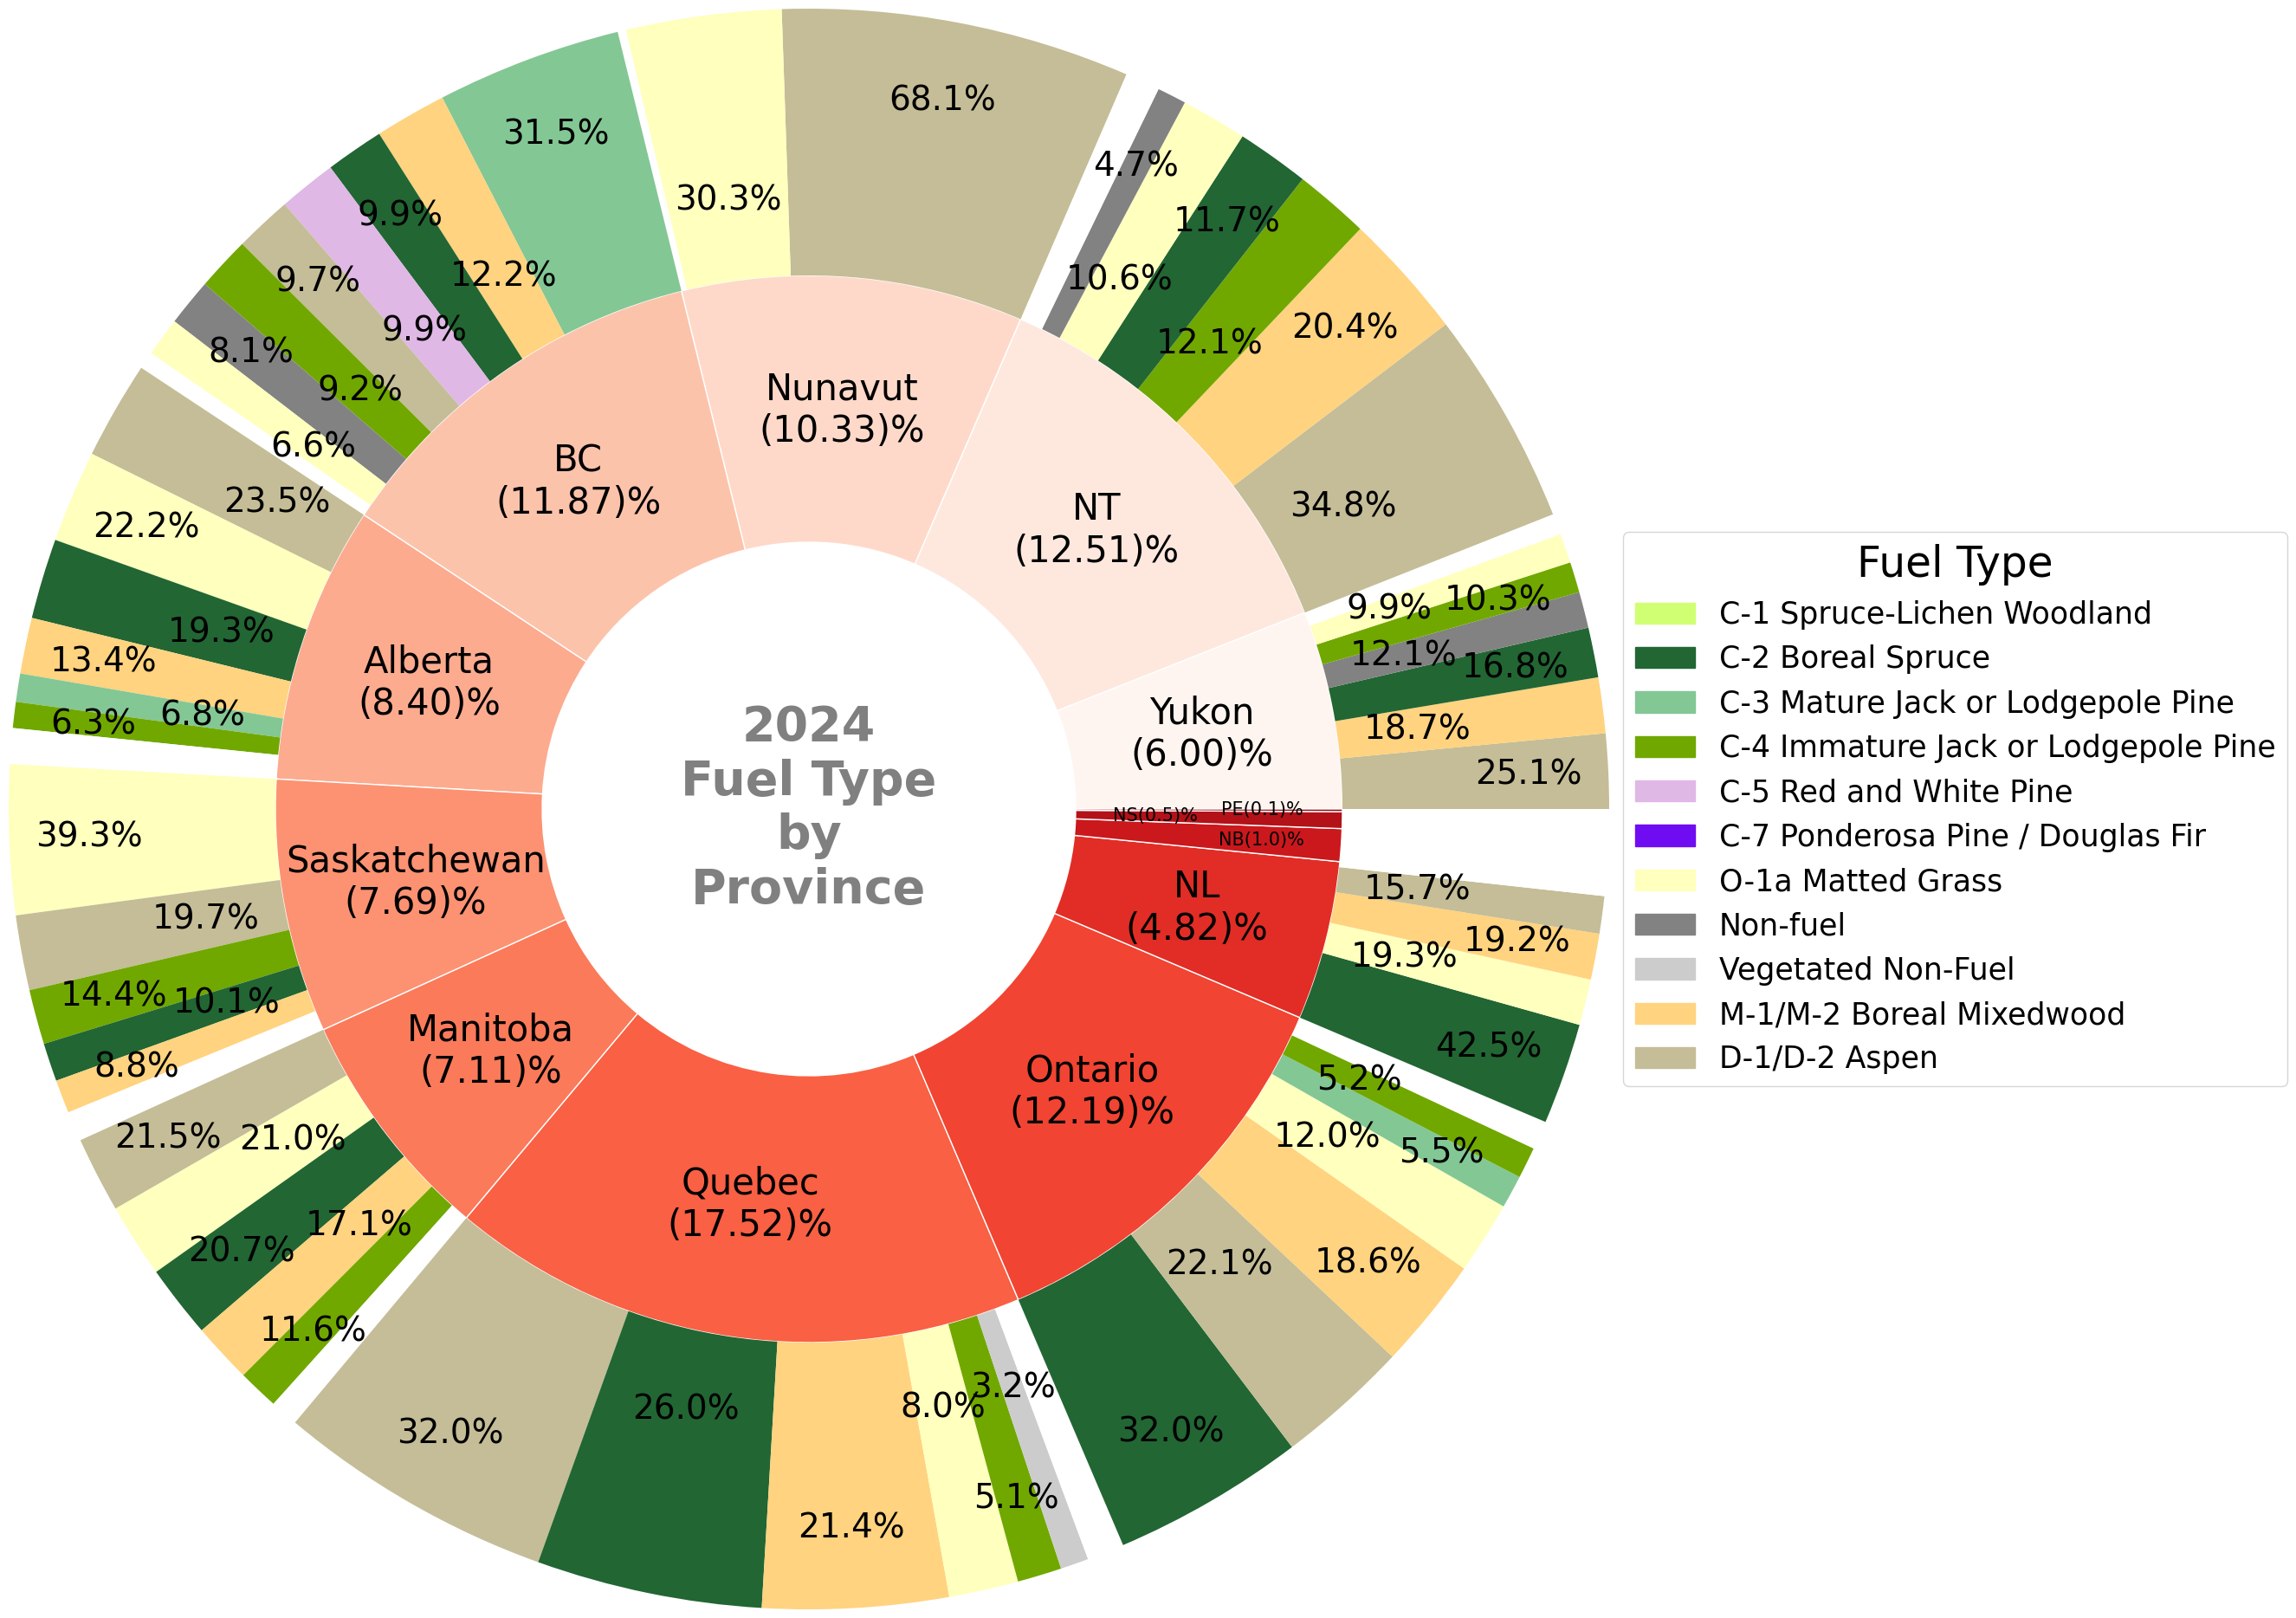

In [33]:
inner_ring_sorted = True

fig, ax = plt.subplots(
    figsize = (20,20)
)

fuel_type_prov_count_df['Provience'] = fuel_type_prov_count_df['Provience'].astype(
    CategoricalDtype(
        categories = prov_order,
        ordered = True
    )
)

fuel_type_prov_count_df = fuel_type_prov_count_df.sort_values(
    by=['Provience', 'Count', 'Fuel Type'], 
    ascending=[inner_ring_sorted, False, True]
)

inner_ring_df = fuel_type_prov_count_df.groupby(
    by = 'Provience'
).sum()['Count']

total_pixels = int(fuel_type_prov_count_df['Count'].sum())


plot_pie_inner_text_title(
    title = f"2024\nFuel Type\nby\nProvince",
)

plot_inner_ring(
    data = inner_ring_df,
    inner_ring_sorted = inner_ring_sorted
)

plot_outer_ring(
    outer_ring_df = fuel_type_prov_count_df,
    inner_ring_df = inner_ring_df,
)

plot_legend(
    legend_anchor = (1.62, 0.5),
    legend_num_col = 1, 
    legend_location = "center right"
)

In [16]:
fuel_type_prov_count_df

,Provience,Fuel Type,Count
12,Yukon,D-1/D-2 Aspen,123400503
12,Yukon,M-1/M-2 Boreal Mixedwood,91817283
176,Yukon,C-2 Boreal Spruce,82211646
182,Yukon,Non-fuel,59567067
178,Yukon,C-4 Immature Jack or Lodgepole Pine,50593893
...,...,...,...
132,Prince Edward Islands,C-2 Boreal Spruce,622870
139,Prince Edward Islands,Non-fuel,514279
134,Prince Edward Islands,C-4 Immature Jack or Lodgepole Pine,176890
133,Prince Edward Islands,C-3 Mature Jack or Lodgepole Pine,89347
